#Fine tuning LLM model

In [ ]:
import torch
import time
import evaluate
import pandas as pd
import numpy as np
from datasets import Dataset, load_dataset
import random

In [ ]:
df=pd.read_excel("/content/final_dataset.xlsx")

df.head()

,Unnamed: 0,Node,Deviation,Cause,Consequence,Effective Safeguards,Recommendations
0,0.0,1. Feed C6 to Rerun Column 5C-01R and NMP & Steam Reboiler 5E-02 & 5E-03N via Feed preheater 5E-01N,1.More Flow of Feed,1.Human error - Battery limit Valve left open during Recirculation Mode (Valve FV-11101 Down stream),"1.Level increases in the rerun column with subsequent rise in pressure in the system beyond design pressure. Leak of Benzene with potential for fire, fatality and asset damage.",1.FIC-11101 will give high Flow Alarm,1.Consider providing low temperature alarm on TI-11151
1,1.0,1. Feed C6 to Rerun Column 5C-01R and NMP & Steam Reboiler 5E-02 & 5E-03N via Feed preheater 5E-01N,3.Misdirected Flow,1.Tube rupture of Feed preheater 5E-01N,"1.NMP will enter HC side, process upset, increase in temperature",1.Feed Preheater designed for a pressure of 20 kg / cm2 and it is operated at 6 kg / cm2,2.Consider providing high temperature alarm on TI-11151
2,2.0,1. Feed C6 to Rerun Column 5C-01R and NMP & Steam Reboiler 5E-02 & 5E-03N via Feed preheater 5E-01N,3.Misdirected Flow,1.Tube rupture of Feed preheater 5E-01N,"1.NMP will enter HC side, process upset, increase in temperature",2.TIC-11352 will give high temperature alarm and regulate the 3way Control Valve,2.Consider providing high temperature alarm on TI-11152
3,3.0,1. Feed C6 to Rerun Column 5C-01R and NMP & Steam Reboiler 5E-02 & 5E-03N via Feed preheater 5E-01N,3.Misdirected Flow,2.Tube rupture of NMP reboiler 5E-02,"1.NMP will enter HC side, process upset, increase in Column bottom temperature",1.NMP Reboiler designed for a pressure of 4 kg / cm2 and it is operated at 0.4 kg/ cm2,2.Consider providing high temperature alarm on TI-11153
4,4.0,1. Feed C6 to Rerun Column 5C-01R and NMP & Steam Reboiler 5E-02 & 5E-03N via Feed preheater 5E-01N,3.Misdirected Flow,2.Tube rupture of NMP reboiler 5E-02,"1.NMP will enter HC side, process upset, increase in Column bottom temperature",2.TIC-11111 (steam) will give high temperature alarm,2.Consider providing high temperature alarm on TI-11154


In [ ]:
df=df.iloc[:,1:]
df.head()

,Node,Deviation,Cause,Consequence,Effective Safeguards,Recommendations
0,1. Feed C6 to Rerun Column 5C-01R and NMP & Steam Reboiler 5E-02 & 5E-03N via Feed preheater 5E-01N,1.More Flow of Feed,1.Human error - Battery limit Valve left open during Recirculation Mode (Valve FV-11101 Down stream),"1.Level increases in the rerun column with subsequent rise in pressure in the system beyond design pressure. Leak of Benzene with potential for fire, fatality and asset damage.",1.FIC-11101 will give high Flow Alarm,1.Consider providing low temperature alarm on TI-11151
1,1. Feed C6 to Rerun Column 5C-01R and NMP & Steam Reboiler 5E-02 & 5E-03N via Feed preheater 5E-01N,3.Misdirected Flow,1.Tube rupture of Feed preheater 5E-01N,"1.NMP will enter HC side, process upset, increase in temperature",1.Feed Preheater designed for a pressure of 20 kg / cm2 and it is operated at 6 kg / cm2,2.Consider providing high temperature alarm on TI-11151
2,1. Feed C6 to Rerun Column 5C-01R and NMP & Steam Reboiler 5E-02 & 5E-03N via Feed preheater 5E-01N,3.Misdirected Flow,1.Tube rupture of Feed preheater 5E-01N,"1.NMP will enter HC side, process upset, increase in temperature",2.TIC-11352 will give high temperature alarm and regulate the 3way Control Valve,2.Consider providing high temperature alarm on TI-11152
3,1. Feed C6 to Rerun Column 5C-01R and NMP & Steam Reboiler 5E-02 & 5E-03N via Feed preheater 5E-01N,3.Misdirected Flow,2.Tube rupture of NMP reboiler 5E-02,"1.NMP will enter HC side, process upset, increase in Column bottom temperature",1.NMP Reboiler designed for a pressure of 4 kg / cm2 and it is operated at 0.4 kg/ cm2,2.Consider providing high temperature alarm on TI-11153
4,1. Feed C6 to Rerun Column 5C-01R and NMP & Steam Reboiler 5E-02 & 5E-03N via Feed preheater 5E-01N,3.Misdirected Flow,2.Tube rupture of NMP reboiler 5E-02,"1.NMP will enter HC side, process upset, increase in Column bottom temperature",2.TIC-11111 (steam) will give high temperature alarm,2.Consider providing high temperature alarm on TI-11154


Data preprocessing

In [ ]:
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import re

def text_cleaner(text):
    if isinstance(text, float) and pd.isna(text):
        return ""  # Return an empty string for NaN values
    else:
        # Lowercase the text
        newString = str(text).lower()

        # Remove HTML tags
        newString = BeautifulSoup(newString, "lxml").text

        # Remove double quotation marks
        newString = re.sub('"', '', newString)

        # Replace "/" with "or"
        newString = re.sub("/", " or ", newString)
        newString = newString.strip()

        # Remove unwanted characters
        newString = re.sub(r":|-|_", " ", newString)

        # Remove special characters
        newString = re.sub(r"[$#@%&*!~?%{}()]", " ", newString)

        # Tokenize the cleaned text and remove stop words
        tokens = [w for w in newString.split()]

        # Remove extra spaces and join the tokens
        words = [i for i in tokens if len(i) >= 1]

        # Join the words and strip leading/trailing spaces
        return " ".join(words).strip()


Deviation_text = []
for t in df['Deviation']:
    Deviation_text.append(text_cleaner(t))

df['Deviation'] = Deviation_text


In [ ]:
# For Node


def text_cleaner(text):
    # Lowercase the text
    newString = text.lower()

    # Remove HTML tags
    newString = BeautifulSoup(newString, "lxml").text

    # Remove double quotation marks
    newString = re.sub('"', '', newString)

    # Replace "/" with "or"
    newString = re.sub("/", " ", newString)
    newString=newString.strip()

    # Remove unwanted characters
    newString = re.sub(r":|-|_", " ", newString)

    # Remove special characters
    newString = re.sub(r"[$#@%&*!~?%{}()]", " ", newString)

    # Tokenize the cleaned text and remove stop words
    tokens = [w for w in newString.split()]

    # Remove extra spaces and join the tokens
    words = [i for i in tokens if len(i) >= 1]

    # Join the words and strip leading/trailing spaces
    return " ".join(words).strip()


Node_text = []
for t in df['Node']:
    Node_text.append(text_cleaner(t))

df['Node']=Node_text

In [ ]:
from bs4 import BeautifulSoup
import re

def text_cleaner(text):
    if pd.notnull(text):  # Check if the value is not null
        # Lowercase the text
        newString = text.lower()

        # Remove HTML tags
        newString = BeautifulSoup(newString, "lxml").text

        # Remove double quotation marks
        newString = re.sub('"', '', newString)

        # Replace "/" with " " (space)
        newString = re.sub("/", " ", newString)
        newString = newString.strip()

        # Remove unwanted characters
        newString = re.sub(r":|-|_", " ", newString)

        # Remove special characters
        newString = re.sub(r"[$#@%&*!~?%{}()]", " ", newString)

        # Tokenize the cleaned text and remove stop words
        tokens = [w for w in newString.split()]

        # Remove extra spaces and join the tokens
        words = [i for i in tokens if len(i) >= 1]

        # Join the words and strip leading/trailing spaces
        return " ".join(words).strip()
    else:
        return ""  # Return an empty string for missing values

Cause_text = []
for t in df['Cause']:
    Cause_text.append(text_cleaner(t))

df['Cause'] = Cause_text


In [ ]:
# For Consequence


def text_cleaner(text):
    if isinstance(text, str):  # Check if text is a valid string
        # Lowercase the text
        newString = text.lower()

        # Remove HTML tags
        newString = BeautifulSoup(newString, "lxml").text

        # Remove double quotation marks
        newString = re.sub('"', '', newString)

        # Replace "/" with "or"
        newString = re.sub("/", " ", newString)
        newString=newString.strip()

        # Remove unwanted characters
        newString = re.sub(r":|-|_", " ", newString)

        # Remove special characters
        newString = re.sub(r"[$#@%&*!~?%{}()]", " ", newString)

        # Tokenize the cleaned text and remove stop words
        tokens = [w for w in newString.split()]

        # Remove extra spaces and join the tokens
        words = [i for i in tokens if len(i) >= 1]

        # Join the words and strip leading/trailing spaces
        return " ".join(words).strip()
    else:
        return "none"


Consequence_text = []
for t in df['Consequence']:
    Consequence_text.append(text_cleaner(t))

df['Consequence']=Consequence_text

In [ ]:
# For Effective Safeguards

def text_cleaner(text):
    if isinstance(text, str):  # Check if text is a valid string
        # Lowercase the text
        newString = text.lower()

        # Remove HTML tags
        newString = BeautifulSoup(newString, "lxml").text

        # Remove double quotation marks
        newString = re.sub('"', '', newString)

        # Replace "/" with "or"
        newString = re.sub("/", " ", newString)
        newString=newString.strip()

        # Remove unwanted characters
        newString = re.sub(r":|-|_", " ", newString)

        # Remove special characters
        newString = re.sub(r"[$#@%&*!~?%{}()]", " ", newString)

        # Tokenize the cleaned text and remove stop words
        tokens = [w for w in newString.split()]

        # Remove extra spaces and join the tokens
        words = [i for i in tokens if len(i) >= 1]

        # Join the words and strip leading/trailing spaces
        return " ".join(words).strip()
    else:
        return "none"


ES_text = []
for t in df['Effective Safeguards']:
    ES_text.append(text_cleaner(t))

df['Effective Safeguards']=ES_text

In [ ]:
# For Recommendations


def text_cleaner(text):
    # Lowercase the text
    newString = text.lower()

    # Remove HTML tags
    newString = BeautifulSoup(newString, "lxml").text

    # Remove double quotation marks
    newString = re.sub('"', '', newString)

    # Replace "/" with "or"
    newString = re.sub("/", " or ", newString)
    newString=newString.strip()

    # Remove unwanted characters
    newString = re.sub(r":|-|_", " ", newString)

    # Remove leading numbers followed by a period and optional whitespace OR directly by text
    newString = re.sub(r"^\d+(\.|\b)", "", newString)

    # Remove special characters
    newString = re.sub(r"[$#@%&*!~?%{}()]", " ", newString)

    # Tokenize the cleaned text and remove stop words
    tokens = [w for w in newString.split()]

    # Remove extra spaces and join the tokens
    words = [i for i in tokens if len(i) >= 1]

    # Join the words and strip leading/trailing spaces
    return " ".join(words).strip()


Recommendations_text = []
for t in df['Recommendations']:
    Recommendations_text.append(text_cleaner(t))

df['Recommendations']=Recommendations_text
df.head()

,Node,Deviation,Cause,Consequence,Effective Safeguards,Recommendations
0,1. feed c6 to rerun column 5c 01r and nmp steam reboiler 5e 02 5e 03n via feed preheater 5e 01n,1.more flow of feed,1.human error battery limit valve left open during recirculation mode valve fv 11101 down stream,"1.level increases in the rerun column with subsequent rise in pressure in the system beyond design pressure. leak of benzene with potential for fire, fatality and asset damage.",1.fic 11101 will give high flow alarm,consider providing low temperature alarm on ti 11151
1,1. feed c6 to rerun column 5c 01r and nmp steam reboiler 5e 02 5e 03n via feed preheater 5e 01n,3.misdirected flow,1.tube rupture of feed preheater 5e 01n,"1.nmp will enter hc side, process upset, increase in temperature",1.feed preheater designed for a pressure of 20 kg cm2 and it is operated at 6 kg cm2,consider providing high temperature alarm on ti 11151
2,1. feed c6 to rerun column 5c 01r and nmp steam reboiler 5e 02 5e 03n via feed preheater 5e 01n,3.misdirected flow,1.tube rupture of feed preheater 5e 01n,"1.nmp will enter hc side, process upset, increase in temperature",2.tic 11352 will give high temperature alarm and regulate the 3way control valve,consider providing high temperature alarm on ti 11152
3,1. feed c6 to rerun column 5c 01r and nmp steam reboiler 5e 02 5e 03n via feed preheater 5e 01n,3.misdirected flow,2.tube rupture of nmp reboiler 5e 02,"1.nmp will enter hc side, process upset, increase in column bottom temperature",1.nmp reboiler designed for a pressure of 4 kg cm2 and it is operated at 0.4 kg cm2,consider providing high temperature alarm on ti 11153
4,1. feed c6 to rerun column 5c 01r and nmp steam reboiler 5e 02 5e 03n via feed preheater 5e 01n,3.misdirected flow,2.tube rupture of nmp reboiler 5e 02,"1.nmp will enter hc side, process upset, increase in column bottom temperature",2.tic 11111 steam will give high temperature alarm,consider providing high temperature alarm on ti 11154


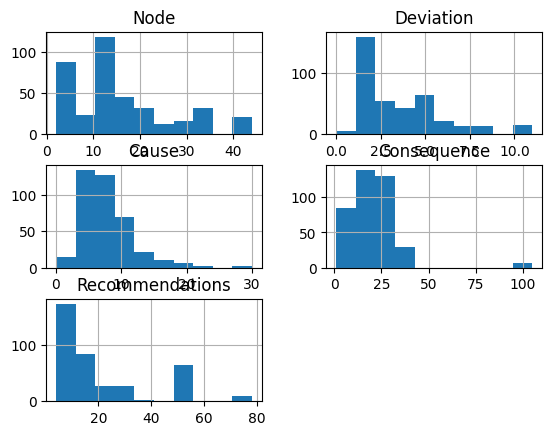

In [ ]:

import matplotlib.pyplot as plt
node_count=[]
deviation_count=[]
cause_count=[]
consequence_count	=[]
es_count=[]
Recommendations_count=[]

# populate the lists with sentence lengths
for i in df['Node']:
      node_count.append(len(i.split()))

for i in df['Deviation']:
      deviation_count.append(len(i.split()))
for i in df['Cause']:
      cause_count.append(len(i.split()))
for i in df['Consequence']:
      consequence_count.append(len(i.split()))
for i in df['Effective Safeguards']:
      es_count.append(len(i.split()))
for i in df['Recommendations']:
      Recommendations_count.append(len(i.split()))

length_df = pd.DataFrame({'Node':node_count, 'Deviation':deviation_count,'Cause':cause_count,'Consequence':consequence_count,'Recommendations':Recommendations_count})
length_df.hist(bins = 10)
plt.show()

In [ ]:
print(max(node_count)+max(deviation_count)+max(cause_count)+max(consequence_count)+max(es_count),max(Recommendations_count))

223 78


In [ ]:
# Concatenating the columns
df['question'] = df.apply(lambda row: f"""what is the recommendations when Deviation is "{row['Deviation']}"in Node - "Node is {row['Node']}" having Cause - "{row['Cause']}", Consequence is "{row['Consequence']}" Effective Safeguards is "{row['Effective Safeguards']}"?""", axis=1)

# Drop the original columns
df.drop(columns=['Node', 'Deviation', 'Cause', 'Consequence','Effective Safeguards'], inplace=True)

In [ ]:
df.head()

,Recommendations,question
0,consider providing low temperature alarm on ti 11151,"what is the recommendations when Deviation is ""1.more flow of feed""in Node - ""Node is 1. feed c6 to rerun column 5c 01r and nmp steam reboiler 5e 02 5e 03n via feed preheater 5e 01n"" having Cause ..."
1,consider providing high temperature alarm on ti 11151,"what is the recommendations when Deviation is ""3.misdirected flow""in Node - ""Node is 1. feed c6 to rerun column 5c 01r and nmp steam reboiler 5e 02 5e 03n via feed preheater 5e 01n"" having Cause -..."
2,consider providing high temperature alarm on ti 11152,"what is the recommendations when Deviation is ""3.misdirected flow""in Node - ""Node is 1. feed c6 to rerun column 5c 01r and nmp steam reboiler 5e 02 5e 03n via feed preheater 5e 01n"" having Cause -..."
3,consider providing high temperature alarm on ti 11153,"what is the recommendations when Deviation is ""3.misdirected flow""in Node - ""Node is 1. feed c6 to rerun column 5c 01r and nmp steam reboiler 5e 02 5e 03n via feed preheater 5e 01n"" having Cause -..."
4,consider providing high temperature alarm on ti 11154,"what is the recommendations when Deviation is ""3.misdirected flow""in Node - ""Node is 1. feed c6 to rerun column 5c 01r and nmp steam reboiler 5e 02 5e 03n via feed preheater 5e 01n"" having Cause -..."


In [ ]:
from sklearn.model_selection import train_test_split
question,x_val,recommendations,y_val=train_test_split(df['question'],df['Recommendations'],test_size=0.1,random_state=0,shuffle=True)

In [ ]:
question.head()

146    what is the recommendations when Deviation is "2. less or no flow"in Node - "Node is 5. fuel oil within naphtha skid" having Cause - "9. flow divider malfunctions", Consequence is "1. gt flame out...
102    what is the recommendations when Deviation is "1.more flow in ed columns"in Node - "Node is 11 primary nmp loop nmp from raffinate column 5c 03r to ed column 5c 02r" having Cause - "1.fv 41351 ina...
60     what is the recommendations when Deviation is "1.more flow"in Node - "Node is 9. raffinate from reflux drum 5v 02r to 5c 03 r p" having Cause - "2.both pumps 5p 05a b running simultaneously", Cons...
282    what is the recommendations when Deviation is "1.high level"in Node - "Node is 2. feed surge drum to suction pump 10 p 101a b" having Cause - "4.fv 002 inadvertently closed", Consequence is "1.pot...
10     what is the recommendations when Deviation is "1.more flow"in Node - "Node is 2. vapour of c6 rerun column 5c 01n to reflux drum 5v 01n through c6 cut condenser 5e 0

In [ ]:
question=list(question)
test_question=list(x_val)
recommendations=list(recommendations)
target=list(y_val)

In [ ]:
len(question),len(test_question)

(351, 39)

In [ ]:
from datasets import DatasetDict, Dataset

# Create DatasetDict
dataset = DatasetDict({
    'train': Dataset.from_dict({'question': question, 'recommendations': recommendations}),
    'test': Dataset.from_dict({'question': test_question, 'recommendations': target})
})

# Print dataset info
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['question', 'recommendations'],
        num_rows: 351
    })
    test: Dataset({
        features: ['question', 'recommendations'],
        num_rows: 39
    })
})


In [ ]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [ ]:
len(dataset['train'])

351

In [ ]:

def format_instruction(question: str, recommendations: str):
	return f"""### Instruction:
Answer the following question

### Input:
{question.strip()}

### Answer:
{recommendations}
""".strip()


In [ ]:
def generate_instruction_dataset(data_point):

    return {
        "question": data_point["question"],
        "recommendations": data_point["recommendations"],
        "text": format_instruction(data_point["question"],data_point["recommendations"])
    }

In [ ]:
def process_dataset(data: Dataset):
    return (
        data.shuffle(seed=42)
        .map(generate_instruction_dataset)
    )

In [ ]:
sample_dataset = dataset.filter(lambda example, index: index % 100 == 0, with_indices=True)

Filter:   0%|          | 0/351 [00:00<?, ? examples/s]

Filter:   0%|          | 0/39 [00:00<?, ? examples/s]

In [ ]:
type(sample_dataset)

datasets.dataset_dict.DatasetDict

In [ ]:
sample_dataset["train"] = process_dataset(sample_dataset["train"])
sample_dataset["test"] = process_dataset(sample_dataset["test"])

Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

In [ ]:
## APPLYING PREPROCESSING ON WHOLE DATASET
dataset["train"] = process_dataset(dataset["train"])
dataset["test"] = process_dataset(dataset["test"])

train_data = dataset['train'].shuffle(seed=42).select([i for i in range(320)])
# Select 10 rows for the test
validation_data = dataset['test']
test_data = dataset['train'].shuffle(seed=42).select([i for i in range(50)])

train_data,test_data,validation_data

Map:   0%|          | 0/351 [00:00<?, ? examples/s]

Map:   0%|          | 0/39 [00:00<?, ? examples/s]

(Dataset({
     features: ['question', 'recommendations', 'text'],
     num_rows: 320
 }),
 Dataset({
     features: ['question', 'recommendations', 'text'],
     num_rows: 50
 }),
 Dataset({
     features: ['question', 'recommendations', 'text'],
     num_rows: 39
 }))

In [ ]:
train_data['question'][0]

'what is the recommendations when Deviation is "3.misdirected flow"in Node - "Node is 1. feed c6 to rerun column 5c 01r and nmp steam reboiler 5e 02 5e 03n via feed preheater 5e 01n" having Cause - "1.tube rupture of feed preheater 5e 01n", Consequence is "1.nmp will enter hc side, process upset, increase in temperature" Effective Safeguards is "2.tic 11352 will give high temperature alarm and regulate the 3way control valve"?'

In [ ]:
sample_dataset["train"]["text"][0]

'### Instruction:\nAnswer the following question\n\n### Input:\nwhat is the recommendations when Deviation is "4.high pressure"in Node - "Node is 4. reflux pump 5p 02 an bn recycle back to rerun column 5c 01r, extract distillation column 5c 02r with reboilers 5e 06 5e 05 and parallel extract distillation column 5c 02p with reboiler 5e 06p and its associated recirculation piping" having Cause - "3.vacuum pump 5p 08a b c failure", Consequence is "1.loss of vacuum in ed column 5c 02r, process upset, product offspec c6 raffinate" Effective Safeguards is "1.pdi 21113 will give high alarm"?\n\n### Answer:\nas 5c 02r column floats with 5c 03 5c 04 columns hence psv on 5c 02r is not provided as there is 1 psv on 5c 03 5c 04 each. evaluate whether the design pressure, capacity and psv set point are adequate to protect 5c 02r. or provide psv on 5c 02r'

# Save our final data as a pickle file

In [ ]:
import pickle

# saving dataset

# Save each dataset to a separate pickle file
with open('train_data.pickle', 'wb') as f:
    pickle.dump(train_data, f)

with open('test_data.pickle', 'wb') as f:
    pickle.dump(test_data, f)

with open('validation_data.pickle', 'wb') as f:
    pickle.dump(validation_data, f)


## Model training

In [1]:
!pip3 install -q -U bitsandbytes==0.42.0
!pip3 install -q -U peft==0.8.2
!pip3 install -q -U trl==0.7.10
!pip3 install -q -U accelerate==0.27.1
!pip3 install -q -U datasets==2.17.0
!pip3 install -q -U transformers==4.38.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.4/183.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.0/102.0 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.7/279.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 11.6 MB/s eta 0:00:00
     ━━━

In [2]:
import os
import transformers
import torch
from google.colab import userdata
from datasets import load_dataset
from trl import SFTTrainer
from peft import LoraConfig
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import BitsAndBytesConfig, GemmaTokenizer

In [3]:
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')

In [4]:
#model_id = "google/gemma-2b"
#model_id = "NousResearch/Llama-2-7b-hf"
#model_id="meta-llama/Meta-Llama-3-8B"
model_id="microsoft/Phi-3-mini-128k-instruct"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

In [5]:
tokenizer = AutoTokenizer.from_pretrained(model_id
                                          ,token=os.environ['HF_TOKEN']
                                          )
model = AutoModelForCausalLM.from_pretrained(model_id,
                                             quantization_config=bnb_config,
                                             device_map={"":0},
                                             token=os.environ['HF_TOKEN'])

tokenizer_config.json:   0%|          | 0.00/3.18k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/3.35k [00:00<?, ?B/s]

The repository for microsoft/Phi-3-mini-128k-instruct contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/microsoft/Phi-3-mini-128k-instruct.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


configuration_phi3.py:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


The repository for microsoft/Phi-3-mini-128k-instruct contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/microsoft/Phi-3-mini-128k-instruct.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


modeling_phi3.py:   0%|          | 0.00/73.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

In [6]:
lora_config = LoraConfig(
    r = 16,
    target_modules = ["q_proj", "o_proj", "k_proj", "v_proj",
                      "gate_proj", "up_proj", "down_proj"],
    task_type = "CAUSAL_LM",
)

In [7]:
import pickle

# Load the processed datasets
with open("train_data.pkl", "rb") as f:
    train_data = pickle.load(f)

with open("test_data.pkl", "rb") as f:
    test_data = pickle.load(f)

with open("validation_data.pkl", "rb") as f:
    validation_data = pickle.load(f)

In [8]:
def formatting_func(example):
    text = f"Question: {example['question'][0]}\nRecommendations: {example['recommendations'][0]}"
    return [text]

In [9]:
trainer = SFTTrainer(
    model=model,
    train_dataset=train_data,
    eval_dataset=validation_data,
    args=transformers.TrainingArguments(
        per_device_train_batch_size=2,
        gradient_accumulation_steps=8,
        warmup_steps=4,
        max_steps=100,
        learning_rate=2e-4,
        fp16=True,
        logging_steps=1,
        output_dir="outputs",
        optim="paged_adamw_8bit"
    ),
    peft_config=lora_config,
    dataset_text_field="text",
    #formatting_func=formatting_func,
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:223: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(


Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Map:   0%|          | 0/39 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:290: UserWarning: You passed a tokenizer with `padding_side` not equal to `right` to the SFTTrainer. This might lead to some unexpected behaviour due to overflow issues when training a model in half-precision. You might consider adding `tokenizer.padding_side = 'right'` to your code.
  warnings.warn(


In [ ]:

import gc
gc.collect()
torch.cuda.empty_cache()

In [10]:
trainer.train()

Step,Training Loss
1,4.458500
2,4.471600
3,4.275300
4,4.618400
5,4.100000
6,4.236700
7,3.623000
8,4.064300
9,3.983900
10,3.742600


TrainOutput(global_step=100, training_loss=2.281045558452606, metrics={'train_runtime': 811.9266, 'train_samples_per_second': 1.971, 'train_steps_per_second': 0.123, 'total_flos': 8035215416647680.0, 'train_loss': 2.281045558452606, 'epoch': 5.0})

In [11]:
index = 1

question = validation_data['question'][index]
answer = validation_data['recommendations'][index]

prompt = f"""
answer the following question.

### Input:
{question}

### Answer:
"""

In [12]:

#text = "Quote: A woman is like a tea bag;"
device = "cuda:0"
inputs = tokenizer(question, return_tensors="pt").to(device)

outputs = model.generate(**inputs, max_new_tokens=20)
print("Model answer :", tokenizer.decode(outputs[0], skip_special_tokens=True))
print("Actual answer :" ,answer)

Model answer : what is the recommendations when Deviation is "2.less or no flow"in Node - "Node is 9. raffinate from reflux drum 5v 02r to 5c 03 r p" having Cause - "4.pump 5p 05a b malfunction failure", Consequence is "2.5c 02p r increase in temperature, benzene slippage to top vapour, process upset leads to c6 raffinate product offspec" Effective Safeguards is "4.pump stop indication in dcs"?
Actual answer : consider providing high . temperature alarm on ti 3112


In [13]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=fef6518c482f0fe0975a51716f9e5aa73d6f8edc939b2b97053022066239f770
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from rouge_score import rouge_scorer
from transformers import pipeline


# Define lists to store evaluation results
all_eval_answers = []
all_decoded_answers = []
max_len = 0

# Instantiate a text generation pipeline
generator = pipeline("text-generation", model=model, tokenizer=tokenizer)


# Iterate through each element in the testdata
for element in test_data['question']:
    # Extract question and ground truth answer from the element
    eval_question = element.strip()
    # Generate model prediction
    generated_answer = generator(eval_question, max_length=500, do_sample=False)

    # Decode generated answer
    decoded_answer = generated_answer[0]['generated_text']

    # Append to lists
    all_decoded_answers.append(decoded_answer)

# Iterate through each element in the testdata
for element in test_data['recommendations']:
    # Extract question and ground truth answer from the element
    eval_answer = element.strip()
    # Append to lists
    all_eval_answers.append(eval_answer)
# Evaluation metrics
accuracy = accuracy_score(all_eval_answers, all_decoded_answers)
precision = precision_score(all_eval_answers, all_decoded_answers, average='macro', zero_division=1)
recall = recall_score(all_eval_answers, all_decoded_answers, average='macro', zero_division=1)
f1 = f1_score(all_eval_answers, all_decoded_answers, average='macro', zero_division=1)

# Join lists into strings
all_decoded_answers_str = ' '.join(all_decoded_answers)
all_eval_answers_str = ' '.join(all_eval_answers)

# ROUGE score
rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
rouge_scores = rouge_scorer.score(all_decoded_answers_str, all_eval_answers_str)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROUGE Score:", rouge_scores)
print("Max_len : ", max_len)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Accuracy: 0.0
Precision: 0.42528735632183906
Recall: 0.5747126436781609
F1 Score: 0.0
ROUGE Score: {'rouge1': Score(precision=0.7118093174431203, recall=0.07051626059890523, fmeasure=0.1283203125), 'rougeL': Score(precision=0.35861321776814736, recall=0.03552645701406032, fmeasure=0.0646484375)}
Max_len :  0


# Merge Trained LoRA Adapter With BASE MODEL and Push Model to Hub

---



In [ ]:
trained_model = AutoPeftModelForCausalLM.from_pretrained(
    peft_model_dir,
    low_cpu_mem_usage=True,
    torch_dtype=torch.float16,
)
# Merge LoRA and base model
merged_model = trained_model.merge_and_unload()

# Save the merged model
merged_model.save_pretrained("merged_model",safe_serialization=True)
tokenizer.save_pretrained("merged_model")

# push merged model to the hub
# merged_model.push_to_hub("user/repo")
# tokenizer.push_to_hub("user/repo")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]